In [1]:
import numpy as np
import math
from numpy.random import default_rng

In [2]:
# Proposal distribution
def Q(previous_x):
    return previous_x + rng.standard_normal(1)[0]

def Q_density(new_x, given):
    return (1/math.sqrt(2 * math.pi) ) * math.e**(-0.5 *((new_x - given)/1)**2)

# Unnormalised probability distribution we want to sample from
def P(x):
    return math.e**(-0.5 *((x - 5)/5)**2)

## Initialisation Step

In [3]:
rng = default_rng()
x_old = -10 # arbitrarily pick x_0 to be 0

## Iterative Steps

In [4]:
samples = []
while len(samples) < 400000:
    # Generate random candidate x':
    proposal = Q(x_old)
    # calculate acceptance probability
    P_ratio = P(proposal)/P(x_old)
    Q_ratio = Q_density(x_old, proposal)/Q_density(proposal, x_old)
    acceptance_prob = min(1, P_ratio * Q_ratio)
    # accept or reject
    u = rng.random()
    if (u <= acceptance_prob):
        x_old = proposal
        samples.append(proposal)
    else:
        x_old = x_old
        samples.append(x_old)
    
    
    


In [5]:
from matplotlib import pyplot as plt

(array([   252.,   2270.,  17673.,  63145., 117184., 116441.,  62166.,
         17848.,   2858.,    163.]),
 array([-15.59887052, -11.48538692,  -7.37190331,  -3.2584197 ,
          0.85506391,   4.96854751,   9.08203112,  13.19551473,
         17.30899834,  21.42248194,  25.53596555]),
 <BarContainer object of 10 artists>)

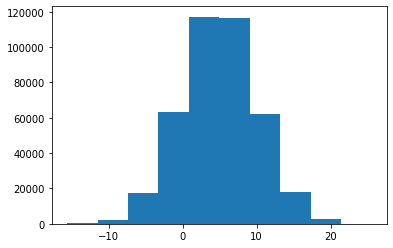

In [6]:
plt.hist(samples)